## Demonstration of the equation extraction workflow

In [1]:
from ocr.demo import img2latex, pdf2latex, postprocess
from ocr.model.img2seq import Img2SeqModel
from ocr.model.utils.general import Config, run
from ocr.model.utils.text import Vocab
from IPython.display import Image, display, Math, Latex
from wand.image import Image as WImage
from variable_extractor import get_variables, unparse
import matplotlib.pyplot as plt
from imgaug import augmenters as iaa
from lxml import etree
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
dir_output = "/home/paulluh/im2latex_weights/1/"
config_vocab = Config(dir_output + "vocab.json")
config_model = Config(dir_output + "model.json")
vocab = Vocab(config_vocab)

model = Img2SeqModel(config_model, dir_output, vocab)
model.build_pred()
model.restore_session(dir_output + "model.weights/")

Building model...
- done.
Reloading the latest trained model...


INFO:tensorflow:Restoring parameters from /home/paulluh/im2latex_weights/1/model.weights/


Restoring parameters from /home/paulluh/im2latex_weights/1/model.weights/


### OCR for math equations.

As the first step of parsing the image of equation, we apply a pre-trained [neural encoder-decoder model](https://github.com/guillaumegenthial/im2latex) to generate latex from the input image.

Pixel Dimensions: (45, 274, 3)
Input image:


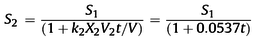

Induced latex code (postprocessed):
{\bf S}_{2}=S_{1}{k_{2}X_{2}V_{2}t/V)}=\frac {S_{1}}((+0.9.95{{T}}(
Rendered result based on the induced latex:


<IPython.core.display.Math object>

In [4]:
from imgaug import augmenters as iaa

seq = iaa.Sequential([
    iaa.GammaContrast(1.8)
])

latex, _, img_path = img2latex(model, 'ocr/data/sandbox/16.png', downsample_image_ratio=1.75, cropping=True, padding=True, gray_scale=True,
                              img_augment=seq)
print('Input image:')
display(Image(img_path))
latex = postprocess(latex)
print('Induced latex code (postprocessed):')
print(latex)
print('Rendered result based on the induced latex:')
display(Math(latex))

Notice that it is not a requirement for us to get the exactly correct latex prediction from the neural network. As long as the latex is valid and contains some variables, we will be able to move to the next step.  

### Extract variables from math equation

Once we are given a latex predicted from the neural network, we apply a parser that we have built based on [Katex](https://katex.org/) to extract all variables in the latex code.

In [5]:
variables = set()
candidates = get_variables(latex)
for v in candidates:
    if isinstance(v, etree._Element):
        variables.add(
            unparse(v)
        )
    else:
        variables.add(
            v
        )
print('Variables:')
for i in list(variables):
    display(Math(i))

Variables:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>